In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
import os
print("import done")

Using TensorFlow backend.


import done


In [2]:
#https://github.com/debadridtt/A-Review-of-Different-Word-Embeddings-for-Sentiment-Classification-using-Deep-Learning/blob/master/LSTM%20Experiment.ipynb

### Loading the data

In [3]:
DATA_FILE = os.path.abspath('../DATA/DATA_not_ameliorate.csv')
df = pd.read_csv(DATA_FILE,delimiter=';',encoding='UTF-8')
print(df.head())

                                                text     label
0  I had ordered a data cable, got a very well fi...  NOTISSUE
1                                   Love This Phone.  NOTISSUE
2                I get a very well finished product.  NOTISSUE
3                             I couldn't be happier.  NOTISSUE
4  I was looking for this headset for a long time...  NOTISSUE


In [4]:
df['label'].value_counts() #balanced Dataset


NOTISSUE    2028
ISSUE       2027
Name: label, dtype: int64

In [5]:
df.shape

(4055, 2)

### Exploratory Data Analysis

C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


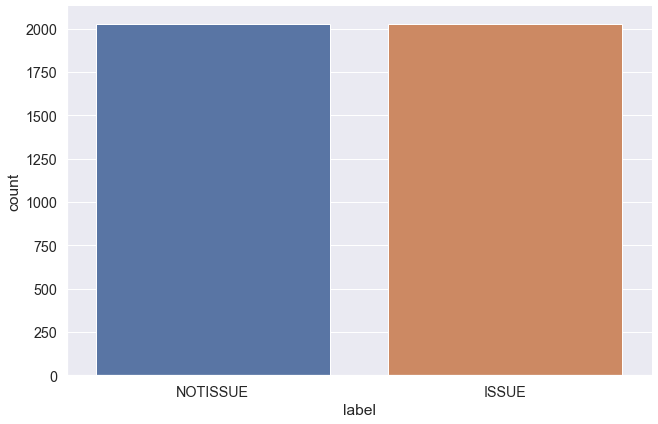

In [6]:
#Target variable
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5)
plt.show();

###  Preprocessing the Data


In [113]:
# List stop words
STOP_WORDS ={
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 #'became',
 'because',
 #'become',
 #'becomes',
 #'becoming',
 'been',
 'before',
 'beforehand',
 #'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 #'call',
 'can',
 'cannot',
 'could',
 'did',
 #'do',
 #'does',
 #'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 #'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'front',
 'full',
 'further',
 #'had',
 #'has',
 #'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'if',
 'in',
 'indeed',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 #'made',
 #'make',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'namely',
 'neither',
 'nevertheless',
 'next',
 'noone',
 'nor',
 'now',
 'nowhere',
 'of',
 'off',
 'often',
 'on',
 'once',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'part',
 'per',
 'perhaps',
 'put',
 'quite',
 'rather',
 're',
 'really',
 'regarding',
 'same',
 #'say',
 #'see',
 #'seem',
 #'seemed',
 #'seeming',
 #'seems',
 'serious',
 'several',
 'she',
 'should',
 #'show',
 'side',
 'since',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 #'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 #'toward',
 #'towards',
 'twelve',
 'under',
 'unless',
 'until',
 'up',
 'upon',
 'us',
 #'used',
 'using',
 'various',
 'very',
 'via',
 'was',
 'we',
 'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [114]:
switcher = {
"couldn't": "could not",
        "couldn": "could not",
        "won't": "will not",
        "won": "will not",
        "mustn't": "must not",
        "mustn": "must not",
        "that'll": "that will",
        "shouldn't": "should not",
        "shouldn": "should not",
        "should've": "should have",
        "haven't": "have not",
        "haven": "have not",
        "hadn't": "have not",
        "hadn": "have not",
        "hasn't": "have not",
        "hasn": "have not",
        "didn't": "do not",
        "didn": "do not",
        "doesn't": "do not",
        "doesn": "do not",
        "don't": "do not",
        "don": "do not", 
        "isn't": "be not",
        "you'd":"you would",
        "you've":"you have",
        "you're":"you are",
        "you'll":"you will",
        "she's":"she is",
        "she'd":"she would",
        "she'll":"she will",
        "he's":"he is",
        "he'd":"he would",
        "he'll":"he will",
        "it's":"it is",
        "it'd":"it would",
        "it'll":"it will",
        "aren't":"are not",
        "aren":"are not",
        "weren't":"were not",
        "weren":"were not",
        "wouldn't":"would not",
        "wouldn":"would not",
        "needn't":"need not",
        "needn":"need not",
        "wasn't":"was not",
        "wasn":"was not",
        "mightn't":"might not",
        "mightn":"might not",
        "shan't":"shall not",
        "shan":"shall not", 
        "can't":"can not",
        "i'm":"i am",
        "i'd":"i would",
        "i'll":"i will",
        "i've":"i have",
        "we're":"we are",
        "we'd":"we would",
        "we'll":"we will",
        "we've":"we have",
        "they're":"they are",
        "they'd":"they would",
        "they'll":"they will",
        "they've":"they have",
        "let's":"let us",
        "how's":"how is",
        "here's":"here is",
        "what's":"what is",
        "there's":"there is",
        'awsm': 'awesome',
        "aamof": "as a matter of fact",
        "abt": "about",
        "abt2": "about to",
        "ac": "air conditioning",
        "ace": "solo winner",
        "ack": "acknowledged",
        "admin": "administrator",
        "thr": "there",
        "frm": "from",
        "aggro": "aggression",
        "agl": "angel",
        "dob": "date of birth",
        "ai": "artificial intelligence",
        "aiic": "as if i care",
        "aka": "also known as",
        "alap": "as long as possible",
        "alol": "actually laughing out loud",
        "ama": "ask me anything",
        "amap": "as much as possible",
        "amazn": "amazing",
        "ammo": "ammunition",
        "ams": "ask me something",
        "anon": "anonymous",
        "asap": "as soon as possible",
        "asat": "as simple as that",
        "awks": "awkward",
        "awl": "always with love",
        "ayk": "as you know",
        "azm": "awesome",
        "b": "be",
        "b&w": "black and white",
        "b-day": "birthday",
        "bday": "birthday",
        "bcoz": "because",
        "bcos": "because",
        "bcz": "because",
        "bf": "boyfriend",
        "btw": "between",
        "b4": "before",
        "bai": "bye",
        "bb": "bye bye",
        "bc": "abuse",
        "mc": "abuse",
        "bcc": "blind carbon copy",
        "bff": "best friends forever",
        "biz": "business",
        "bk": "back",
        "bo": "back off",
        "bro": "brother",
        "btwn": "between",
        "c": "see",
        "char": "character",
        "combo": "combination",
        "cu": "see you",
        "cu2": "see you too",
        "cu2mr": "see you tomorrow",
        "cya": "see ya",
        "cyal8r": "see you later",
        "cyb": "call you back",
        "cye": "check your e-mail",
        "cyf": "check your facebook",
        "cyfb": "check your facebook",
        "cyl": "catch ya later",
        "cym": "check your myspace",
        "cyo": "see you online",
        "d8": "date",
        "da": "the",
        "dece": "decent",
        "ded": "dead",
        "dept": "department",
        "dis": "this",
        "ditto": "same",
        "diva": "rude woman",
        "dk": "don't know",
        "dlm": "don't leave me",
        "dm": "direct message",
        "dnd": "do not disturb",
        "dno": "don't know",
        "dnt": "don't",
        "e1": "everyone",
        "eg": "for example",
        "emc2": "genius",
        "emo": "emotional",
        "enuf": "enough",
        "eod": "end of discussion",
        "eof": "end of file",
        "eom": "end of message",
        "eta": "estimated time of arrival",
        "every1": "everyone",
        "evs": "whatever",
        "exp": "experience",
        "f": "female",
        "f2f": "face to face",
        "f2p": "free to play",
        "f2t": "free to talk",
        "f9": "fine",
        "fab": "fabulous",
        "fail": "failure",
        "faq": "frequently asked questions",
        "fav": "favorite",
        "fave": "favorite",
        "favs": "favorites",
        "fb": "facebook",
        "fbc": "facebook chat",
        "fbf": "facebook friend",
        "fml": "family",
        "fn": "fine",
        "fo": "freaking out",
        "fri": "friday",
        "frnd": "friend",
        "fu": "fuck you",
        "fugly": "fucking ugly",
        "gf": "girlfriend",
        "g1": "good one",
        "g2b": "going to bed",
        "g2cu": "good to see you",
        "g2g": "good to go",
        "g4i": "go for it",
        "g4n": "good for nothing",
        "g4u": "good for you",
        "g9": "goodnight",
        "ga": "go ahead",
        "ge": "good evening",
        "gl": "good luck",
        "gm": "good morning",
        "gn": "goodnight",
        "gonna": "going to",
        "goon": "idiot",
        "gorge": "gorgeous",
        "gr8": "great",
        "grats": "congratulations",
        "gratz": "congratulations",
        "grl": "girl",
        "gt2t": "got time to talk",
        "gtg": "good to go",
        "gud": "good",
        "gv": "give",
        "gvn": "given",
        "gw": "good work",
        "h/o": "hold on",
        "h/p": "hold please",
        "h/t": "hat tip",
        "h/u": "hook up",
        "h2cus": "hope to see you soon",
        "h4u": "hot for you",
        "h4x0r": "hacker",
        "h4x0rz": "hackers",
        "h8": "hate",
        "h8r": "hater",
        "h8t": "hate",
        "ha": "hello again",
        "haha": "laughing",
        "hai": "hi",
        "hak": "hugs and kisses",
        "han": "how about now?",
        "hav": "have",
        "hax": "hacks",
        "haxor": "hacker",
        "hay": "how are you",
        "hb2u": "happy birthday to you",
        "hbbd": "happy belated birthday",
        "hbd": "happy birthday",
        "hc": "how cool",
        "hcit": "how cool is that",
        "hehe": "laughing",
        "hf": "have fun",
        "hi5": "high five",
        "hig": "how's it going?",
        "hih": "hope it helps",
        "ho": "hold on",
        "hoc": "house of cards",
        "hof": "hall of fame",
        "holla": "holler",
        "hom": "hit or miss",
        "hood": "neighborhood",
        "hoops": "basketball",
        "hottie": "attractive person",
        "hr": "human resources",
        "hru": "how are you",
        "hry": "hurry",
        "hubby": "husband",
        "hwk": "homework",
        "hwp": "height weight proportionate",
        "hwu": "hey, what's up?",
        "hxc": "hardcore",
        "h^": "hook up",
        "i8": "i ate",
        "i8u": "i hate you",
        "ia": "i agree",
        "iab": "in a bit",
        "iac": "in any case",
        "iad": "it all depends",
        "iae": "in any event",
        "iag": "it's all good",
        "iagw": "in a good way",
        "iail": "i am in love",
        "iam": "in a minute",
        "ic": "i see",
        "id10t": "idiot",
        "idc": "i don't care",
        "idd": "indeed",
        "idi": "i doubt it",
        "idk": "i don't know",
        "idky": "i don't know why",
        "idmb": "i'll do my best",
        "idn": "i don't know",
        "idnk": "i do not know",
        "idr": "i don't remember",
        "idt": "i don't think",
        "idts": "i don't think so",
        "idtt": "i'll drink to that",
        "idu": "i don't understand",
        "ie": "that is",
        "ig2p": "i got to pee",
        "iggy": "ignored",
        "ight": "alright",
        "igi": "i get it",
        "ign": "in-game name",
        "igtp": "i get the point",
        "ih8u": "i hate you",
        "ihu": "i hate you",
        "ihy": "i hate you",
        "ii": "i'm impressed",
        "iiok": "if i only knew",
        "iir": "if i remember",
        "iirc": "if i remember correctly",
        "iit": "i'm impressed too",
        "iiuc": "if i understand correctly",
        "ik": "i know",
        "ikhyf": "i know how you feel",
        "ikr": "i know, right?",
        "ikwum": "i know what you mean",
        "ikwym": "i know what you mean",
        "ikyd": "i know you did",
        "ilu": "i like you",
        "ilu2": "i love you too",
        "ilub": "i love you baby",
        "ilyk": "i'll let you know",
        "ilyl": "i love you lots",
        "ilysm": "i love you so much",
        "ima": "i'm",
        "imma": "i'm gonna",
        "imo": "in my opinion",
        "imy": "i miss you",
        "inb4": "in before",
        "inc": "incoming",
        "indie": "independent",
        "info": "information",
        "init": "initialize",
        "ipo": "initial public offering",
        "ir": "in room",
        "ir8": "irate",
        "irdk": "i really don't know",
        "irl": "in real life",
        "iyo": "in your opinion",
        "iyq": "i like you",
        "j/k": "just kidding",
        "j/p": "just playing",
        "j/w": "just wondering",
        "j2lyk": "just to let you know",
        "j4f": "just for fun",
        "j4g": "just for grins",
        "jas": "just a second",
        "jb/c": "just because",
        "joshing": "joking",
        "k": "ok",
        "k3u": "i love you",
        "kappa": "sarcasm",
        "kek": "korean laugh",
        "keke": "korean laugh",
        "kewl": "cool",
        "kewt": "cute",
        "kfc": "kentucky fried chicken",
        "kgo": "ok, go",
        "kik": "laughing out loud",
        "kinda": "kind of",
        "kk": "ok",
        "kl": "kool",
        "km": "kiss me",
        "kma": "kiss my ass",
        "knp": "ok, no problem",
        "kw": "know",
        "kwl": "cool",
        "l2m": "listening to music",
        "l2p": "learn to play",
        "l33t": "leet",
        "l8": "late",
        "l8er": "later",
        "l8r": "later",
        "la": "laughing a lot",
        "laf": "laugh",
        "laffing": "laughing",
        "lafs": "love at first sight",
        "lam": "leave a message",
        "lamer": "lame person",
        "legit": "legitimate",
        "lemeno": "let me know",
        "lil": "little",
        "lk": "like",
        "llol": "literally laughing out loud",
        "lmho": "laughing my head off",
        "loi": "laughing on the inside",
        "lola": "love often, laugh a lot",
        "lolol": "lots of laugh out louds",
        "lolz": "laugh out louds",
        "ltr": "later",
        "lulz": "lol",
        "luv": "love",
        "luzr": "loser",
        "lv": "love",
        "ly": "love ya",
        "lya": "love you always",
        "lyk": "let you know",
        "lyn": "lying",
        "lysm": "love you so much",
        "m": "male",
        "mcd": "mcdonald's",
        "mcds": "mcdonald's",
        "md@u": "mad at you",
        "me2": "me too",
        "meh": "whatever",
        "mf": "mother fucker",
        "mfb": "mother fucking bitch",
        "mgmt": "management",
        "mid": "middle",
        "mil": "mother-in-law",
        "min": "minute",
        "mins": "minutes",
        "mk": "okay",
        "mkay": "ok",
        "mmk": "ok",
        "mms": "multimedia messaging service",
        "mng": "manage",
        "mngr": "manager",
        "mod": "modification",
        "mofo": "mother fucking",
        "mojo": "attractive talent",
        "moss": "chill",
        "ms": "miss",
        "msg": "message",
        "mtg": "meeting",
        "mth": "month",
        "mu": "miss you",
        "mu@": "meet you at",
        "muah": "kiss",
        "mula": "money",
        "mwa": "kiss",
        "mwah": "kiss",
        "n/m": "nevermind",
        "n/m/h": "nothing much here",
        "n/r": "no reserve",
        "n00b": "newbie",
        "n1": "nice one",
        "n1c": "no one cares",
        "n2m": "not too much",
        "n2mh": "not too much here",
        "n2w": "not to worry",
        "n64": "nintendo 64",
        "n8kd": "naked",
        "nac": "not a chance",
        "nah": "no",
        "nal": "nationality",
        "narc": "tattle tale",
        "nark": "informant",
        "naw": "no",
        "nb": "not bad",
        "nbd": "no big deal",
        "nbjf": "no brag, just fact",
        "nd": "and",
        "ne": "any",
        "ne1": "anyone",
        "ne1er": "anyone here",
        "neh": "no",
        "nemore": "anymore",
        "neva": "never",
        "neway": "anyway",
        "newaze": "anyways",
        "newb": "newbie",
        "nite": "night",
        "nn2r": "no need to reply",
        "nnito": "not necessarily in that order",
        "nnto": "no need to open",
        "nntr": "no need to reply",
        "no1": "no one",
        "noob": "newbie",
        "nooblet": "young newbie",
        "nooblord": "ultimate newbie",
        "notch": "minecraft creator",
        "nottie": "unattractive person",
        "np": "no problem",
        "nub": "newbie",
        "nuff": "enough",
        "nufn": "nothing",
        "num": "tasty",
        "nvm": "nevermind",
        "nvr": "never",
        "nvrm": "nevermind",
        "nw": "no way",
        "nxt": "next",
        "o4u": "only for you",
        "obtw": "oh, by the way",
        "obv": "obviously",
        "obvi": "obviously",
        "oc": "of course",
        "ohemgee": "oh my gosh",
        "oic": "oh, i see",
        "oicn": "oh, i see now",
        "oiy": "hi",
        "omg": "oh my god",
        "onl": "online",
        "onoz": "oh no",
        "orly": "oh really",
        "otay": "okay",
        "otw": "on the way",
        "outta": "out of",
        "ovie": "overlord",
        "ownage": "completely owned",
        "p/d": "per day",
        "p/m": "per month",
        "p/y": "per year",
        "p911": "parent alert!",
        "p@h": "parents at home",
        "pc": "personal computer",
        "pda": "public display of affection",
        "pic": "picture",
        "pj": "poor joke",
        "pl8": "plate",
        "pld": "played",
        "pls": "please",
        "plz": "please",
        "plzrd": "please read",
        "pov": "point of view",
        "ppl": "people",
        "ppp": "peace",
        "prof": "professor",
        "prolly": "probably",
        "promo": "promotion",
        "props": "recognition",
        "prot": "protection",
        "prvt": "private",
        "ps": "postscript",
        "ps2": "playstation 2",
        "ps3": "playstation 3",
        "psa": "public service announcement",
        "psog": "pure stroke of genius",
        "psp": "playstation portable",
        "ptm": "please tell me",
        "pwd": "password",
        "psd": "password",
        "pswd": "password",
        "pwnd": "owned",
        "pwned": "owned",
        "pwnt": "owned",
        "q4u": "question for you",
        "qfe": "quoted for emphasis",
        "qft": "quoted for truth",
        "qq": "quick question",
        "qqn": "looking",
        "qrg": "quick reference guide",
        "qt": "cutie",
        "qtpi": "cutie pie",
        "r": "are",
        "r8": "rate",
        "rdy": "ready",
        "re": "replay",
        "rehi": "hi again",
        "rents": "parents",
        "rep": "reputation",
        "resq": "rescue",
        "rgd": "regard",
        "rgds": "regards",
        "ridic": "ridiculous",
        "rip": "rest in peace",
        "rl": "real life",
        "rlrt": "real life retweet",
        "rly": "really",
        "rm": "room",
        "rn": "run",
        "rnt": "aren't",
        "rof": "laughing",
        "rofl": "laughing",
        "roflmao": "laughing",
        "roflol": "laughing out loud",
        "rolf": "laughing",
        "ru": "are you",
        "ruc": "are you coming?",
        "rut": "are you there?",
        "rx": "prescription",
        "s/o": "sold out",
        "s/u": "shut up",
        "s/w": "software",
        "s2r": "send to receive",
        "s2s": "sorry to say",
        "s2u": "same to you",
        "samzd": "still amazed",
        "sd": "sweet dreams",
        "sec": "second",
        "sho": "sure",
        "sh^": "shut up",
        "siul8r": "see you later",
        "siv": "bad goaltender",
        "sk8": "skate",
        "sk8r": "skater",
        "sly": "still love you",
        "smf": "so much fun",
        "smooch": "kiss",
        "sorta": "sort of",
        "spec": "specialization",
        "spk": "speak",
        "spkr": "speaker",
        "srry": "sorry",
        "srs": "serious",
        "srsly": "seriously",
        "sry": "sorry",
        "stpd": "stupid",
        "str": "strength",
        "str8": "straight",
        "sup": "what's up",
        "syl": "see you later",
        "sync": "synchronize",
        "t2go": "time to go",
        "t2m": "talk to me",
        "t2u": "talk to you",
        "t2ul": "talk to you later",
        "t2ul8er": "talk to you later",
        "t2ul8r": "talk to you later",
        "t4lmk": "thanks for letting me know",
        "t4p": "thanks for posting",
        "t4t": "thanks for trade",
        "tc": "take care",
        "teh": "the",
        "teme": "tell me",
        "tg": "thank goodness",
        "thnq": "thank you",
        "tho": "though",
        "thru": "through",
        "tht": "that",
        "thx": "thanks",
        "tl": "tell",
        "tlk": "talk",
        "tlkin": "talking",
        "tlking": "talking",
        "tomoz": "tomorrow",
        "tq": "thank you",
        "tqvm": "thank you very much",
        "tru": "true",
        "ttl": "talk to you later",
        "ttly": "totally",
        "ttul": "talk to you later",
        "tty": "talk to you",
        "tu": "thank you",
        "tude": "attitude",
        "tx": "thanks",
        "txt": "text",
        "txtin": "texting",
        "ty": "thank you",
        "tyfa": "thank you for asking",
        "tyl": "thank you lord",
        "tym": "thank you much",
        "tyt": "take your time",
        "tyvm": "thank you very much",
        "u": "you",
        "u-ok": "you ok?",
        "u/l": "upload",
        "u2": "you too",
        "u2u": "up to you",
        "uok": "you ok?",
        "ur": "your",
        "ut": "you there?",
        "veggies": "vegetables",
        "vry": "very",
        "vs": "versus",
        "w/": "with",
        "w/b": "welcome back",
        "w/e": "whatever",
        "w/o": "without",
        "w2f": "way too funny",
        "w2g": "way to go",
        "w2k": "windows 2000",
        "w4u": "wait for you",
        "w8": "wait",
        "w84m": "wait for me",
        "w8am": "wait a minute",
        "w8ing": "waiting",
        "w8n": "waiting",
        "wa": "what",
        "waa": "crying",
        "wack": "strange",
        "wan2": "want to",
        "wannabe": "want to be",
        "wat": "what",
        "watev": "whatever",
        "watevs": "whatever",
        "wlcm": "welcome",
        "wha": "what",
        "whipped": "tired",
        "wht": "what",
        "wk": "week",
        "wknd": "weekend",
        "wtf": "what the fuck",
        "wtg": "way to go",
        "wup": "what's up?",
        "ya": "yes",
        "yeap": "yes",
        "yep": "yes",
        "yepperz": "yes",
        "yesh": "yes",
        "yo": "hi",
        "yr": "your",
        "yrs": "years",
        "yt": "you there?",
        "yt?": "you there?",
        "yup": "yes",
        "yupz": "ok",
        "zzz": "sleeping",
        "ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
        "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [115]:
import nltk
import inflect
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import parsing
from gensim.parsing.preprocessing import split_alphanum
from spellchecker import SpellChecker
import re

In [116]:
"""def replace_word(word):
    # Convert text to lower
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    #stops = set(stopwords.words("english"))

    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Removing all the tokens with lesser than 3 characters
    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)
    
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    
    
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        
        ##### Lemmatization
        # Reduce words to their root form
        # Lemmatize verbs by specifying pos
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    return text"""

'def replace_word(word):\n    # Convert text to lower\n    word = word.lower()\n    word = word.split()\n    for i in range(len(word)):\n        word[i] = switcher.get(word[i], word[i])\n    word = " ".join(word)\n    return word\n\ndef transformText(text):\n    text = split_alphanum(text)\n    # Convert text to lower\n    text = text.lower()\n    text = replace_word(text)\n    #stops = set(stopwords.words("english"))\n\n    # Removing non ASCII chars    \n    text = re.sub(r\'[^\x00-\x7f]\',r\' \',text)\n    \n    # Removing all the tokens with lesser than 3 characters\n    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)\n    \n    # Strip all the numerics\n    #text = gensim.parsing.preprocessing.strip_numeric(text)\n    \n    # Removing all the stopwords\n    filtered_words = [word for word in text.split() if word not in STOP_WORDS]\n    \n    # Preprocessed text after stop words removal\n    text = " ".join(filtered_words)\n    \n    # Remove the punctuation\n    te

In [117]:
def replace_word(word):
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def remove_alphanumerics(text):
    """
    Remove alphanumeric words from text
    Example: hello man whatsup123 => hello man
    Args:
        text (str): text
    Returns:
        text (str): text with removed alphanumeric words
    """
    txt = []
    for each in text.split():
        if not any(x in each.lower() for x in "0123456789"):
            txt.append(each)
    txtsent = " ".join(txt)
    return txtsent

##Fixing Word Lengthening
##https://rustyonrampa"ge.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def replace_numbers(word):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    word = word.split()
    for i in range(len(word)):
        if word[i].isdigit():
            word[i] = p.number_to_words(word[i])
    word = " ".join(word)
    return word
def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    text = replace_numbers(text)
    text = reduce_lengthening(text)
    text=remove_alphanumerics(text)
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    return text

In [118]:
transformText(" she'd've don't I have so 20 soooooo  sd201 don't i'm  can't servic going grooooooooop")

'have do not have twenty soo sweet dream two one do not service go group'

In [13]:
df['text'] = df['text'].map(transformText)
texts= df['text']
tags= df['label']

In [119]:
df['text'] = df['text'].map(lambda x: transformText(x))

In [120]:
texts= df['text']
tags= df['label']

In [121]:
#df=df[texts,tags]

In [122]:
# dictionary of lists  
dict = {'text': texts , 'label': tags } 
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('../Data/DATA_preprocessing9.2.csv')

In [123]:
#### load pretraining data

In [124]:
DATA_FILE = '../Data/DATA_preprocessing9.2.csv'
df = pd.read_csv(DATA_FILE,delimiter=',',encoding='UTF-8')

In [125]:
msk = np.random.rand(len(df)) < 0.7 # Splitting into train(70%) and test(30%) randomly

In [126]:
train_df=df[msk]
test_df=df[~msk]

In [127]:
print(train_df.shape)
print(test_df.shape)

(2809, 3)
(1246, 3)


In [128]:
print('Checking target values for train data:\n')
print(train_df['label'].value_counts(),'\n')
print('Checking target values for test data:\n')
print(test_df['label'].value_counts())

Checking target values for train data:

NOTISSUE    1406
ISSUE       1403
Name: label, dtype: int64 

Checking target values for test data:

ISSUE       624
NOTISSUE    622
Name: label, dtype: int64


In [129]:
train_df['label'].value_counts()


NOTISSUE    1406
ISSUE       1403
Name: label, dtype: int64

In [130]:
x_train=train_df['text']
y_train=train_df['label']
x_test=test_df['text']
y_test=test_df['label']

### GLOVE EMBEDDING 300

In [131]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [132]:
texts_train = x_train.astype(str)
texts_test = x_test.astype(str)

In [133]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

C:\Users\khmar\ana\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [134]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")

In [135]:
print('Shape of data tensor:', data.shape)
print('Shape of test_data tensor:', test_data.shape)

Shape of data tensor: (2809, 200)
Shape of test_data tensor: (1246, 200)


In [136]:
import pickle
file_tok = '../Model/LSTM_token_glove_300d_DATA_wit_text_processing9.2.sav'
pickle.dump(tokenizer, open(file_tok, 'wb'))

In [137]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 2956 unique tokens.


In [138]:
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (2809, 200)
Shape of data test tensor: (1246, 200)


In [139]:
y_train = y_train.map({"NOTISSUE": 1, "ISSUE" : 0 })
y_test = y_test.map({"NOTISSUE": 1, "ISSUE" : 0 })

In [140]:
# load the whole embedding into memory
embeddings_index = {}
f = open('C:/Users/khmar/Desktop/GLOVE/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [141]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
#Found 1489 unique tokens : word_index
#print(len(word_index) + 1) #### 1490 
#print(word_index.items()) ### unique tokens : words :word_index
#print('embedding_matrix',embedding_matrix)
out_of_vocab={}
for word, i in word_index.items():
    #print(i)
    embedding_vector = embeddings_index.get(word)
    #print('embedding_vector' ,embedding_vector )
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        #print('word: ', word)
        embedding_matrix[i] = embedding_vector
        #print('embedding_matrix :',embedding_matrix[i] )
        # words not found in embedding index will be all-zeros.
    if embedding_vector is  None:
        print('word not found :',word)
        out_of_vocab[i] = word
            

word not found : flavourful
word not found : appal
word not found : flavourless
word not found : cosiness
word not found : shawarrma
word not found : ciob
word not found : accessoryone
word not found : barset
word not found : plantronincs
word not found : supertooth
word not found : reoccure
word not found : convertor
word not found : convolute
word not found : mesmerise
word not found : tigerlilly
word not found : infatuate
word not found : untasted
word not found : cheesecurds
word not found : chipolte
word not found : albondigas
word not found : smashburger


In [142]:
f'There are {len(out_of_vocab)} out of vocab '

'There are 21 out of vocab '

In [143]:

model_glove= Sequential()
model_glove.add(Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model_glove.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model_glove.add(Dense(1, activation='sigmoid'))

In [144]:
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [145]:
model_glove.fit(data, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(test_data, y_test))

Train on 2809 samples, validate on 1246 samples
Epoch 1/2
2809/2809 [==============================] - 72s 25ms/step - loss: 0.5119 - acc: 0.7640 - val_loss: 0.4513 - val_acc: 0.8058
Epoch 2/2
2809/2809 [==============================] - 32s 11ms/step - loss: 0.4105 - acc: 0.8213 - val_loss: 0.4535 - val_acc: 0.7857


In [146]:
scores = model_glove.evaluate(x_test, y_test,
                            batch_size=batch_size)
print("%s: %.2f%%" % (model_glove.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model_glove.metrics_names[1], scores[1] * 100))

1246/1246 [==============================] - 3s 3ms/step
loss: 45.35%
acc: 78.57%


In [147]:
# Save the model
model_glove.save('../Model/LSTM_model_glove_300_DATA_with_text_processing_v9.2.sav')

### Prediction

In [148]:
##one text prediction!

In [149]:
def prediction(input_file,output_file):
    df= pd.DataFrame(columns=['label', 'text'])
    data = pd.read_csv(input_file,delimiter=',')
    inputt=data.text
    x_input = inputt.values
    ind=0
    for i in x_input:
        ind=ind+1
        text=np.array([i])
        seq= tokenizer.texts_to_sequences(text)
        sequences_matrix = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
        proba = model_glove.predict(sequences_matrix)
        class_pred = model_glove.predict_classes(sequences_matrix)
        classe=prediction_classe(class_pred)
        print(ind,i,proba,classe)
        df=df.append({'label':classe, 'text':i},ignore_index=True)
    df.to_csv(output_file,sep=';')
    return data,df

def prediction_classe(class_pred):
    if class_pred==0 :
        classe='ISSUE' 
    if class_pred==1 :
        classe='NOTISSUE'

    return classe

In [150]:
text="great product"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.9549765]]
NOTISSUE


In [151]:
text="I have a problem can you help me"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.42234665]]
ISSUE


In [152]:
text=" very recommend"
text=transformText(text)
print(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

recommend
[[0.7058171]]
NOTISSUE


In [153]:
#predict all data

In [154]:
input_file ='../Data/DATA_preprocessing9.csv'
output_file ='../Model/LSTM_data_pred_glove_300_with_text_v9.2.csv'
prediction(input_file,output_file)

1 have order data cable get well finish work product [[0.8425812]] NOTISSUE
2 love phone [[0.92829525]] NOTISSUE
3 get well finish product [[0.85079336]] NOTISSUE
4 not be happier [[0.4478692]] ISSUE
5 look headset long time have get [[0.70501125]] NOTISSUE
6 headset start ring no reason [[0.20823622]] ISSUE
7 display excellent camera good year [[0.99736494]] NOTISSUE
8 battery life great [[0.9716381]] NOTISSUE
9 worst phone have have have month [[0.2880908]] ISSUE
10 not good item work start have problem auto reverse tape player [[0.2976416]] ISSUE
11 embarrass ear hurt try push ear plug ear [[0.24615274]] ISSUE
12 protect phone side [[0.70521253]] NOTISSUE
13 average phone bad battery life operate weak network [[0.12577838]] ISSUE
14 clear skye call long battery life long range [[0.8413595]] NOTISSUE
15 solo technology suck [[0.63795376]] NOTISSUE
16 great hand free device [[0.972211]] NOTISSUE
17 take self portrait outside exterior display cool [[0.85522395]] NOTISSUE
18 problem hav

139 not recommend item anyone [[0.46917444]] ISSUE
140 holster arrive not match photo ad [[0.37465188]] ISSUE
141 great no problem all [[0.5535849]] NOTISSUE
142 earlier review note plug charger nothing happen [[0.2646388]] ISSUE
143 frog phone charm adorable eye catch [[0.8644515]] NOTISSUE
144 never know push hard right number time function want not [[0.40115032]] ISSUE
145 sound clear people talk amaze quality too [[0.8424425]] NOTISSUE
146 get aluminum case new palm v work well it have protect handheld perfectly far [[0.9499491]] NOTISSUE
147 good product well make [[0.976295]] NOTISSUE
148 mobile phone tool have [[0.8776529]] NOTISSUE
149 be impress job motorola steadiness phone [[0.7604008]] NOTISSUE
150 receive order well ship timeframe everything good work order overall be excite have source [[0.8569905]] NOTISSUE
151 phone sturdy waterproof [[0.7991684]] NOTISSUE
152 be not impress not recommend item anyone [[0.32112795]] ISSUE
153 complaint standard sound volume little low tu

272 post detail comment grey black phone have fire red great color [[0.8490673]] NOTISSUE
273 not have problem item order again need [[0.5206023]] NOTISSUE
274 get pay guess [[0.39162242]] ISSUE
275 not software do great job this make intone form exist cd internet connection [[0.8478206]] NOTISSUE
276 im surprise good quality car charger not review it [[0.88605195]] NOTISSUE
277 fabulous [[0.9080157]] NOTISSUE
278 however bt headset currently not good real time game like first person shooter audio delay mess up [[0.3127402]] ISSUE
279 price cable excellent [[0.97299033]] NOTISSUE
280 disappoint accessory good manufacturer [[0.6377751]] NOTISSUE
281 perform awful muffle tinny incoming sound severe echo end call [[0.22624375]] ISSUE
282 wind resistant [[0.50203174]] NOTISSUE
283 obviously have terrible customer service get pay for [[0.22414269]] ISSUE
284 do not forever [[0.18485577]] ISSUE
285 it not overly expensive replace [[0.15757574]] ISSUE
286 easy operate sound better have try [[

400 nano state it my son disappoint [[0.20084085]] ISSUE
401 sound quality excellent well [[0.99579984]] NOTISSUE
402 best headset have use [[0.84094447]] NOTISSUE
403 not recommend [[0.44131634]] ISSUE
404 have be year carry highest quality anti glare screen protector have find date [[0.7797403]] NOTISSUE
405 want [[0.61699235]] NOTISSUE
406 particular model not work motorola q smartphone [[0.81149024]] NOTISSUE
407 wont work right at least me [[0.6132811]] NOTISSUE
408 addition feel amp look phone lightweight cheap plastic [[0.8816621]] NOTISSUE
409 out warranty problem reoccure bottom line money else singular not support it [[0.23976393]] ISSUE
410 want plantronics five ten be right one have issue me the good [[0.8594626]] NOTISSUE
411 crisp clear [[0.7023976]] NOTISSUE
412 charge keep go dead minute [[0.27383187]] ISSUE
413 cheap plastic creak like old wooden floor [[0.61750275]] NOTISSUE
414 get absolutely horrible reception apartment phone have not have problem [[0.20894966]] ISS

540 cutout button place perfectly [[0.94722444]] NOTISSUE
541 love be able use one headset land line cell [[0.76316893]] NOTISSUE
542 problem ear loop make weak material break easily [[0.17855485]] ISSUE
543 not nearly good look amazon picture make look [[0.7382396]] NOTISSUE
544 despite flaw case exceptional quality well worth additional cost own official oem product [[0.77508616]] NOTISSUE
545 stupid that [[0.07710064]] ISSUE
546 hear be drive car usually do not have loudest set [[0.45517266]] ISSUE
547 seller ship quickly cheaper competitor [[0.64336324]] NOTISSUE
548 good show samsung [[0.9553901]] NOTISSUE
549 buy ten save a lot money [[0.6667381]] NOTISSUE
550 cut make beep beep beep sound say signal fail [[0.39701745]] ISSUE
551 not figure [[0.35282698]] ISSUE
552 phone sound ok not great ok wife s phone totally unintelligible not understand word be say it [[0.29239678]] ISSUE
553 have take battery phone back restart it [[0.43244857]] ISSUE
554 manage bend leaf spring back place

690 call center service worst customer service have deal [[0.2540351]] ISSUE
691 have deal bad customer service [[0.15615702]] ISSUE
692 six extremely frustrate hour [[0.38815963]] ISSUE
693 do not have problem software [[0.2635406]] ISSUE
694 reverse error be nightmare [[0.03391588]] ISSUE
695 pretty do need [[0.79038715]] NOTISSUE
696 point customer service rep nice [[0.9460361]] NOTISSUE
697 do not have infrastructure provide basic level service [[0.5967751]] NOTISSUE
698 customer support system payroll upgrade product scary [[0.42154592]] ISSUE
699 do not send receipt [[0.18638538]] ISSUE
700 receipt get copy invoice not format print correctly [[0.26828465]] ISSUE
701 disturb people suppose be account expert [[0.43452674]] ISSUE
702 start look alternative intuit obviously do not understand basic account audit principle [[0.28551275]] ISSUE
703 thoroughly disappoint [[0.24739031]] ISSUE
704 be not do business company anymore give bad support [[0.10602883]] ISSUE
705 online informati

834 problem hard make [[0.3483627]] ISSUE
835 sound not clear [[0.330436]] ISSUE
836 record speaker do not bother slow give chance understand repeat be say [[0.12118755]] ISSUE
837 like listen actual french speaker [[0.47155982]] ISSUE
838 bad actually want learn pronounce be say [[0.26116443]] ISSUE
839 totally useless do not know basic french grammar [[0.23799625]] ISSUE
840 try use product learn become nightmare [[0.18377492]] ISSUE
841 do have version word phrase make easier sound out [[0.42254618]] ISSUE
842 unfortunately basic japanese grammar japanese alphabet write japanese [[0.1937552]] ISSUE
843 click have sound you [[0.75911653]] NOTISSUE
844 have no clue sound out [[0.3399431]] ISSUE
845 click sound [[0.78150827]] NOTISSUE
846 teach nothing read language [[0.24321195]] ISSUE
847 have be familiar japanese order use product [[0.48423064]] ISSUE
848 experience product say get quickly [[0.6356304]] NOTISSUE
849 product useful [[0.80958307]] NOTISSUE
850 probably have stop [[0.2

992 excite get game [[0.8719901]] NOTISSUE
993 read previously write review [[0.44813195]] ISSUE
994 love spend time computer [[0.8997733]] NOTISSUE
995 game have fault [[0.17952496]] ISSUE
996 have listen review [[0.6458282]] NOTISSUE
997 game be enjoyable [[0.92892534]] NOTISSUE
998 make play hard frustrate [[0.45467493]] ISSUE
999 game extremely clichy [[0.78181565]] NOTISSUE
1000 idea great [[0.94290465]] NOTISSUE
1001 ugly [[0.0839517]] ISSUE
1002 new notebook not send receive mail [[0.43080547]] ISSUE
1003 wireless connection not work [[0.59486663]] NOTISSUE
1004 not recommend product [[0.46219203]] ISSUE
1005 very very slow move aimless movie distress drift young man [[0.5750401]] NOTISSUE
1006 not sure lose flat character audience nearly half walk out [[0.36448678]] ISSUE
1007 attempt wariness black white clever camera angle movie disappoint become ridiculous act poor plot line non existent [[0.02686037]] ISSUE
1008 little music speak of [[0.49804583]] ISSUE
1009 rest movie lac

1123 flat re-enactments do not hold attention emotionally adrift stage [[0.39212677]] ISSUE
1124 rest sit be awful soldier sing song masculinity pledge to hairsplitting purity admiration sword etc [[0.79074717]] NOTISSUE
1125 bore piece kill momentum movie quicker else [[0.27766126]] ISSUE
1126 schroder have make resume lousy amateurish film [[0.09547201]] ISSUE
1127 however recently watch thing again do completely strike extremely stupid storyline contain hole inconsistency frankly lot crap horrid dance be [[0.07166041]] ISSUE
1128 mean realistic world never have get ballet repertory thing pathetic [[0.20324391]] ISSUE
1129 character development lack depth [[0.32901692]] ISSUE
1130 wo talk awful [[0.06853026]] ISSUE
1131 do not waste time [[0.11230037]] ISSUE
1132 horrible [[0.0570903]] ISSUE
1133 worst happiest dialogue go on [[0.22645637]] ISSUE
1134 make unmatchable direction [[0.63557273]] NOTISSUE
1135 poor actor [[0.2651406]] ISSUE
1136 tell have talent not have pathetic line sp

1241 thing worse taylor s act stanwyck s sing [[0.52693313]] NOTISSUE
1242 producer go for miss entirely [[0.6331498]] NOTISSUE
1243 cheap cheerless heist movie poor characterisation lot undermine style stoic demote [[0.12647343]] ISSUE
1244 squib look awful [[0.07842721]] ISSUE
1245 no point proceed do look remotely like america [[0.34734896]] ISSUE
1246 plot be derivative predictable end like mercy kill [[0.1366685]] ISSUE
1247 awful dialogue hopeless operate get shoot real waste space time [[0.1253575]] ISSUE
1248 uneasy bad movie be not scar all [[0.11177269]] ISSUE
1249 dialogue compose thing make little sense [[0.61321336]] NOTISSUE
1250 thirty minute footage waste show mediocre elderly actor [[0.11952454]] ISSUE
1251 direct sloppy best [[0.7468458]] NOTISSUE
1252 hackneyed write certainly make worse bad direct [[0.01745486]] ISSUE
1253 course act blah [[0.31387523]] ISSUE
1254 act cast be scale balance perfectly operate interact [[0.9160307]] NOTISSUE
1255 and finally that get e

1359 delete film mind [[0.5692314]] NOTISSUE
1360 one worst show time [[0.14371213]] ISSUE
1361 show begin smart as ed comment be totally wall uncalled for [[0.14587654]] ISSUE
1362 fat computer geek unbelievable bible thumper bad as girl actor [[0.48214668]] ISSUE
1363 never hear cole totally unbelievable part [[0.31185532]] ISSUE
1364 time open mouth expect hear you see kid pull plug mercy kill horrible show [[0.09128052]] ISSUE
1365 story unbelievable actor [[0.89384925]] NOTISSUE
1366 lame be best way describe it [[0.43939847]] ISSUE
1367 im big fan rpg game too movie disgrace self respect roger be [[0.43560857]] ISSUE
1368 line cut audio everything wrong [[0.30986372]] ISSUE
1369 find better movie couture [[0.8468448]] NOTISSUE
1370 line do not waste time money one bad come [[0.06311967]] ISSUE
1371 lassie movie have be put sleep forever [[0.49363157]] ISSUE
1372 describe painfully dreary time waster film [[0.15620245]] ISSUE
1373 mediocre aspect become dull [[0.07266078]] ISSUE
1

1481 movie show lot florida best make look appeal [[0.9285449]] NOTISSUE
1482 song best muppets hilarious [[0.9030446]] NOTISSUE
1483 cool [[0.74206376]] NOTISSUE
1484 right case movie deliver everything right face [[0.56250274]] NOTISSUE
1485 review long overdue consider tale two sister be single greatest film make [[0.88404316]] NOTISSUE
1486 gem movie term screenplay cinematography act post production edit direct aspect film make [[0.6662829]] NOTISSUE
1487 practically perfect true masterpiece sea faux masterpiece [[0.85912025]] NOTISSUE
1488 structure film easily tightly construct history cinema [[0.76992327]] NOTISSUE
1489 think no film vitally important occur minute [[0.33136052]] ISSUE
1490 word content level film easily fill dozen film [[0.78154916]] NOTISSUE
1491 right mind ask movie this [[0.74802667]] NOTISSUE
1492 simply highest superlative form cinema imaginable [[0.5369768]] NOTISSUE
1493 yes film do require significant puzzle solve piece fit create beautiful picture [[0.

1603 good show watch [[0.95217615]] NOTISSUE
1604 pretty funny [[0.8557954]] NOTISSUE
1605 kid cool too [[0.8368826]] NOTISSUE
1606 give television series ten plus could [[0.8061249]] NOTISSUE
1607 say have tap episode find watch again [[0.68078566]] NOTISSUE
1608 do not know exactly movie latch endear movie have become special family s memory [[0.71640337]] NOTISSUE
1609 totally absolutely recommend movie like good wholesome family movie exactly be [[0.9505512]] NOTISSUE
1610 thing four kid get absolutely hilarious watch [[0.73365957]] NOTISSUE
1611 one best movie show strong sibling bond other [[0.92341864]] NOTISSUE
1612 interest action suspense unneeded controversy [[0.31513155]] ISSUE
1613 everything act cinematography solid [[0.9506307]] NOTISSUE
1614 damian talented versatile way write portray different character screen [[0.9782055]] NOTISSUE
1615 movie have cut edge it [[0.69736767]] NOTISSUE
1616 be please know modern day genius let passion art drive take audience him [[0.9341

1727 nine ten truly lovely film [[0.99004185]] NOTISSUE
1728 handout scene [[0.44871584]] ISSUE
1729 technically film well make impressive camera work solid act effective music [[0.99359035]] NOTISSUE
1730 wild stuff highly recommend fan diallo cinema [[0.9083419]] NOTISSUE
1731 movie interest begin end [[0.67354584]] NOTISSUE
1732 movie reveal [[0.34407926]] ISSUE
1733 fresh subtle sublime effect [[0.7963387]] NOTISSUE
1734 small great film [[0.9850638]] NOTISSUE
1735 actor give wonderful performance [[0.9940724]] NOTISSUE
1736 learn lot real inside emotion people movie [[0.7318823]] NOTISSUE
1737 movie fascinate [[0.7124557]] NOTISSUE
1738 not forget movie [[0.22535804]] ISSUE
1739 movie awesome [[0.9471842]] NOTISSUE
1740 extraordinary film [[0.9260287]] NOTISSUE
1741 film well pace understate one best courtroom documentary have see [[0.7384294]] NOTISSUE
1742 wonderful inspire watch [[0.99384415]] NOTISSUE
1743 edit film phenomenal opinion [[0.8681013]] NOTISSUE
1744 film offer del

1854 service suck [[0.39607856]] ISSUE
1855 shrimp tender moist [[0.7967183]] NOTISSUE
1856 not deal good drag establishment again [[0.4808004]] ISSUE
1857 hard judge side good gross melt styrofoam not want eat fear get sick [[0.09467188]] ISSUE
1858 positive note server attentive provide great service [[0.99697757]] NOTISSUE
1859 freeze duck disgust worst people behind register [[0.06461444]] ISSUE
1860 thing like prime rib dessert section [[0.7741895]] NOTISSUE
1861 bad food damn generic [[0.14963]] ISSUE
1862 burger good beef cook right [[0.9211335]] NOTISSUE
1863 want sandwich go warehouse [[0.6756945]] NOTISSUE
1864 greek salad greek dress tasty pity hummus refresh [[0.846461]] NOTISSUE
1865 order duck rare pink tender inside nice character outside [[0.9483847]] NOTISSUE
1866 come run realize husband have leave sunglass table [[0.49101752]] ISSUE
1867 chow mein good [[0.90328526]] NOTISSUE
1868 have horrible attitude towards customer talk one customer do not enjoy food [[0.4058825

1979 delicious [[0.9015757]] NOTISSUE
1980 place hand down one best place eat phoenix metro area [[0.8429157]] NOTISSUE
1981 do not go look good food [[0.67458457]] NOTISSUE
1982 have never be treat bad [[0.08272005]] ISSUE
1983 bacon hella salty [[0.6880247]] NOTISSUE
1984 order spinach avocado salad ingredient sad dress literally have zero taste [[0.34611347]] ISSUE
1985 vega fine din use be right menu hand lady have no price list [[0.6423189]] NOTISSUE
1986 waitress friendly [[0.9431613]] NOTISSUE
1987 lordy khan so dish not be miss curry lover [[0.7514033]] NOTISSUE
1988 everything menu terrific thrill make amaze accommodation vegetarian daughter [[0.995761]] NOTISSUE
1989 catch night judge review be not inspire go back [[0.463771]] ISSUE
1990 service leave lot be desire [[0.68579024]] NOTISSUE
1991 atmosphere modern hip maintain touch cosiness [[0.92525786]] NOTISSUE
1992 not weekly haunt definitely place come back while [[0.6097931]] NOTISSUE
1993 literally sit twenty minute no o

2120 good price [[0.9385331]] NOTISSUE
2121 everything work try the device certainly engineer clever way construction feel good [[0.9345707]] NOTISSUE
2122 receive quickly work great [[0.96835583]] NOTISSUE
2123 have be work great [[0.9649554]] NOTISSUE
2124 people complain find headset s microphone weak [[0.12398563]] ISSUE
2125 old nokia two thousand one sixty tracfone hold charge lot better this [[0.7550514]] NOTISSUE
2126 do not care consumer one bite [[0.2028306]] ISSUE
2127 good battery get fast [[0.94826734]] NOTISSUE
2128 instruction manual lack [[0.12106649]] ISSUE
2129 slim fit alarm clock dock station remove case [[0.32068276]] ISSUE
2130 phone hold charge like new [[0.68528026]] NOTISSUE
2131 battery unreliable well service use antenna [[0.6367892]] NOTISSUE
2132 uncomfortable sound quality poor compare phone razor previous wire headset that plug lg [[0.5973]] NOTISSUE
2133 have get lot compliment it [[0.7884678]] NOTISSUE
2134 definitely have state do not allow cell phone 

2259 record blood pressure morning time after get night s sleep [[0.44469345]] ISSUE
2260 use exercise equipment forty five minute stretch exercise breakfast fifteen minute desperate devise [[0.46832854]] ISSUE
2261 blood pressure have not change significantly six month continue take blood pressure medicine [[0.4158449]] ISSUE
2262 meditation do thing buy tape take class [[0.4484982]] ISSUE
2263 get pedometer find instruction not clear [[0.34942225]] ISSUE
2264 pedometer arrive hold prisoner difficult to open plastic cell package engineer think take ten minute two ruin fingernail open it take scissor it hard package break them [[0.32828045]] ISSUE
2265 have use repeatedly past month major problem [[0.20348935]] ISSUE
2266 have trouble unit start [[0.18783279]] ISSUE
2267 replace battery send unit solve problem [[0.27128404]] ISSUE
2268 have no problem far [[0.19964723]] ISSUE
2269 good need [[0.957074]] NOTISSUE
2270 deputy que j ai de probe me de do stout au r veil cet extender lombar

2376 one forgettable movie have see [[0.44061953]] ISSUE
2377 one uninteresting mess [[0.04555618]] ISSUE
2378 hi [[0.8091782]] NOTISSUE
2379 serve hot bread butter home make potato chip bacon bit top very original good [[0.9461363]] NOTISSUE
2380 watch prepare delicious food [[0.96059465]] NOTISSUE
2381 egg roll fantastic [[0.94951284]] NOTISSUE
2382 order arrive one gyro miss [[0.48987055]] ISSUE
2383 have salad wing ice cream dessert leave feel satisfy [[0.88334304]] NOTISSUE
2384 be not sure joey s vote best hot dog valley reader phoenix magazine [[0.8639095]] NOTISSUE
2385 best place go tasty bowl pho [[0.9291949]] NOTISSUE
2386 have never be insult felt disrespect [[0.03420379]] ISSUE
2387 friendly staff [[0.9443347]] NOTISSUE
2388 worth drive [[0.63047725]] NOTISSUE
2389 have hear good thing place exceed hope have dream of [[0.9089692]] NOTISSUE
2390 food great service [[0.9810239]] NOTISSUE
2391 warm beer not help [[0.6681289]] NOTISSUE
2392 great brunch spot [[0.98474264]] NOT

2507 bread make in house [[0.7928654]] NOTISSUE
2508 downside service [[0.48277208]] ISSUE
2509 also fry doubt worst fry have have [[0.23393804]] ISSUE
2510 service exceptional food good review [[0.9935226]] NOTISSUE
2511 couple month later return have amaze meal [[0.8206296]] NOTISSUE
2512 favorite place town shawarrma [[0.8682581]] NOTISSUE
2513 black eye pea sweet potato unreal [[0.81092554]] NOTISSUE
2514 not be disappoint [[0.16544421]] ISSUE
2515 serve vinaigrette make better overall dish good [[0.97932625]] NOTISSUE
2516 go far place have never see restaurant serve one egg breakfast especially [[0.70068026]] NOTISSUE
2517 mom get home immediately get sick have bite salad [[0.4075869]] ISSUE
2518 server not pleasant deal do not honor pizza hut coupon [[0.36745453]] ISSUE
2519 truly unbelievably good be glad go back [[0.97923696]] NOTISSUE
2520 have fantastic service please atmosphere [[0.97402835]] NOTISSUE
2521 everything gross [[0.32525492]] ISSUE
2522 love place [[0.9486718]] 

2640 be far sushi connoisseur definitely tell difference good food bad food certainly bad food [[0.16486832]] ISSUE
2641 insult [[0.11850438]] ISSUE
2642 time have lunch have be bad [[0.10075702]] ISSUE
2643 chicken wing contain driest chicken meat have eat [[0.37309068]] ISSUE
2644 food good enjoy mouthful enjoyable relax venue couple small family group etc [[0.964535]] NOTISSUE
2645 fragile think great [[0.9317813]] NOTISSUE
2646 best later tot southwest [[0.8033887]] NOTISSUE
2647 love place [[0.9486718]] NOTISSUE
2648 definitely not worth pay [[0.36479372]] ISSUE
2649 vanilla ice cream creamy smooth profiterole chou pastry fresh enough [[0.9893773]] NOTISSUE
2650 im a time have new spot [[0.7344387]] NOTISSUE
2651 manager worst [[0.05632675]] ISSUE
2652 inside nice clean [[0.96807086]] NOTISSUE
2653 food outstanding price reasonable [[0.9677568]] NOTISSUE
2654 do not think be run back carly s anytime soon food [[0.40999037]] ISSUE
2655 fact take twenty minute be acknowledge thirty 

2778 waitress friendly happy accomodate vegan reggie option [[0.9776857]] NOTISSUE
2779 oh god felt like have never eat thai food dish [[0.7875203]] NOTISSUE
2780 extremely crumb pretty tasteless [[0.6037762]] NOTISSUE
2781 pale color instead nice character have no flavor [[0.6837119]] NOTISSUE
2782 crouton taste homemade extra plus [[0.89224553]] NOTISSUE
2783 get home see driest damn wing ever [[0.30791953]] ISSUE
2784 be regular stop trip phoenix [[0.4237378]] ISSUE
2785 enjoy cream caf expand tell friend have best breakfast [[0.9925271]] NOTISSUE
2786 not good money [[0.5766602]] NOTISSUE
2787 miss wish have one philadelphia [[0.80232286]] NOTISSUE
2788 get sit fairly fast but end wait forty minute place order thirty minute food arrive [[0.20718122]] ISSUE
2789 have best cheese crisp town [[0.97866344]] NOTISSUE
2790 good value great food great service [[0.9991959]] NOTISSUE
2791 not ask satisfy meal [[0.51738554]] NOTISSUE
2792 food good [[0.9430352]] NOTISSUE
2793 awesome [[0.922

2912 great food awesome service [[0.9976829]] NOTISSUE
2913 one nice thing add gratuity bill party larger six not expect tip that [[0.5403287]] NOTISSUE
2914 fly apple juice fly [[0.41736835]] ISSUE
2915 now nan chicken tasty [[0.9292019]] NOTISSUE
2916 service think good [[0.9365729]] NOTISSUE
2917 food barely lukewarm have be sit wait server bring u [[0.31222534]] ISSUE
2918 ryan s bar definitely one edinburgh establishment not be revisit [[0.41984445]] ISSUE
2919 nicest chinese restaurant have be while [[0.8737124]] NOTISSUE
2920 overall like food service [[0.77684194]] NOTISSUE
2921 serve indian nan bread hummus spicy pine nut sauce world [[0.9162178]] NOTISSUE
2922 probably never come back not recommend it [[0.37293288]] ISSUE
2923 friend s pasta bad barely touch it [[0.24355792]] ISSUE
2924 try airport experience tasty food speedy friendly service [[0.99400324]] NOTISSUE
2925 love decor chinese calligraphy wall paper [[0.8148406]] NOTISSUE
2926 never have complain here [[0.142729

3050 spend money elsewhere [[0.53716284]] NOTISSUE
3051 disappoint experience [[0.36803323]] ISSUE
3052 service extremely slow [[0.35660934]] ISSUE
3053 awful service [[0.15706038]] ISSUE
3054 not go again [[0.35087082]] ISSUE
3055 seasonal fruit fresh white peach puree [[0.9062261]] NOTISSUE
3056 keep get worse worse be officially do [[0.06716225]] ISSUE
3057 do not waste money here [[0.10596882]] ISSUE
3058 love food nice plastic container [[0.9810906]] NOTISSUE
3059 cram food little paper take-out box [[0.5033751]] NOTISSUE
3060 definitely not eat again [[0.445793]] ISSUE
3061 cr pe delicate thin moist [[0.65019566]] NOTISSUE
3062 place honestly be blow up [[0.23036265]] ISSUE
3063 food quality have be horrible [[0.1835024]] ISSUE
3064 service fair best [[0.96402854]] NOTISSUE
3065 price think place have go [[0.6982937]] NOTISSUE
3066 place fairly clean [[0.8944331]] NOTISSUE
3067 food simply not worth it [[0.26000804]] ISSUE
3068 meat pretty dry [[0.5194662]] NOTISSUE
3069 want wai

3181 not believe dirty oyster be [[0.19539595]] ISSUE
3182 probably not go again [[0.31821972]] ISSUE
3183 potato great biscuit [[0.9256099]] NOTISSUE
3184 eat twice visit especially enjoy salmon salad [[0.97186667]] NOTISSUE
3185 fact be go round four star awesome [[0.9373529]] NOTISSUE
3186 excellent [[0.95748013]] NOTISSUE
3187 have lunch have great experience [[0.9639686]] NOTISSUE
3188 job be nice polite wash dish otherwise [[0.9122668]] NOTISSUE
3189 bad day [[0.07124269]] ISSUE
3190 have low tolerance rude customer service people [[0.28834412]] ISSUE
3191 disbelief dish qualify worst version food have taste [[0.20124921]] ISSUE
3192 have never have bland food surprise consider article read focus spice flavor [[0.72151154]] NOTISSUE
3193 felt server terrible job [[0.10391948]] ISSUE
3194 best service food ever maria server good friendly make day [[0.99415004]] NOTISSUE
3195 no one table think food average worth wait have it [[0.36062637]] ISSUE
3196 no way plug go converter [[0.3

3313 have be winner u [[0.79798496]] NOTISSUE
3314 setup not have be simpler [[0.48635334]] ISSUE
3315 have try different earpiece cell phone cabra one one have find fit ear comfortably [[0.75492924]] NOTISSUE
3316 not get strong signal [[0.42332917]] ISSUE
3317 minute please purchase [[0.7112246]] NOTISSUE
3318 bad quality [[0.17466207]] ISSUE
3319 get job do [[0.51139146]] NOTISSUE
3320 great audio [[0.9573171]] NOTISSUE
3321 basically service bad [[0.07104215]] ISSUE
3322 not work cell phone plug be set charger [[0.71836805]] NOTISSUE
3323 have have bluetooth week like it [[0.77211404]] NOTISSUE
3324 bt headset disappointment [[0.35746244]] ISSUE
3325 small do not realize get use it [[0.49688676]] ISSUE
3326 accompany software brilliant [[0.87006474]] NOTISSUE
3327 headset work great package nicely avoid damage [[0.8533979]] NOTISSUE
3328 definitely recommend [[0.84259105]] NOTISSUE
3329 buyer be careful [[0.60996664]] NOTISSUE
3330 majority logitech earn headset fail [[0.8103097]] 

3442 be not sure joey s vote best hot dog valley reader phoenix magazine [[0.8639095]] NOTISSUE
3443 best place go tasty bowl pho [[0.9291949]] NOTISSUE
3444 have never be insult felt disrespect [[0.03420379]] ISSUE
3445 friendly staff [[0.9443347]] NOTISSUE
3446 worth drive [[0.63047725]] NOTISSUE
3447 have hear good thing place exceed hope have dream of [[0.9089692]] NOTISSUE
3448 food great service [[0.9810239]] NOTISSUE
3449 warm beer not help [[0.6681289]] NOTISSUE
3450 great brunch spot [[0.98474264]] NOTISSUE
3451 service friendly invite [[0.90483874]] NOTISSUE
3452 good lunch spot [[0.9300995]] NOTISSUE
3453 have live one thousand nine seventy nine and last time have step foot place [[0.42358023]] ISSUE
3454 have live one thousand nine seventy nine and last time have step foot place [[0.42358023]] ISSUE
3455 worst experience ever [[0.12383821]] ISSUE
3456 have be night place [[0.7137431]] NOTISSUE
3457 side relish mix mushroom yukon gold puree white corn beauteous [[0.89538974]

3575 go far place have never see restaurant serve one egg breakfast especially [[0.70068026]] NOTISSUE
3576 mom get home immediately get sick have bite salad [[0.4075869]] ISSUE
3577 server not pleasant deal do not honor pizza hut coupon [[0.36745453]] ISSUE
3578 truly unbelievably good be glad go back [[0.97923696]] NOTISSUE
3579 have fantastic service please atmosphere [[0.97402835]] NOTISSUE
3580 everything gross [[0.32525492]] ISSUE
3581 love place [[0.9486718]] NOTISSUE
3582 great service food [[0.9800397]] NOTISSUE
3583 bathroom location dirty seat cover not replenish plain yucky [[0.05378412]] ISSUE
3584 burger get gold standard burger kind disappoint [[0.36661828]] ISSUE
3585 omg food delicious [[0.9341265]] NOTISSUE
3586 nothing authentic place [[0.48426574]] ISSUE
3587 spaghetti nothing special whatsoever [[0.23513654]] ISSUE
3588 dish salmon best great [[0.9964495]] NOTISSUE
3589 vegetable fresh sauce feel like authentic thai [[0.84259367]] NOTISSUE
3590 worth drive tucson [

3706 love place [[0.9486718]] NOTISSUE
3707 definitely not worth pay [[0.36479372]] ISSUE
3708 vanilla ice cream creamy smooth profiterole chou pastry fresh enough [[0.9893773]] NOTISSUE
3709 im a time have new spot [[0.7344387]] NOTISSUE
3710 manager worst [[0.05632675]] ISSUE
3711 inside nice clean [[0.96807086]] NOTISSUE
3712 food outstanding price reasonable [[0.9677568]] NOTISSUE
3713 do not think be run back carly s anytime soon food [[0.40999037]] ISSUE
3714 fact take twenty minute be acknowledge thirty five minute get food and keep forget thing [[0.26789272]] ISSUE
3715 love margarita too [[0.9319016]] NOTISSUE
3716 vega buffet not disappoint [[0.2824542]] ISSUE
3717 good though [[0.9082685]] NOTISSUE
3718 one note ventilation use upgrade [[0.5194997]] NOTISSUE
3719 great pork sandwich [[0.93612254]] NOTISSUE
3720 do not waste time here [[0.11230037]] ISSUE
3721 total letdown go comeback flower shop cartel coffee [[0.5169001]] NOTISSUE
3722 third cheese friend s burger cold [[0

3843 crouton taste homemade extra plus [[0.89224553]] NOTISSUE
3844 get home see driest damn wing ever [[0.30791953]] ISSUE
3845 be regular stop trip phoenix [[0.4237378]] ISSUE
3846 enjoy cream caf expand tell friend have best breakfast [[0.9925271]] NOTISSUE
3847 not good money [[0.5766602]] NOTISSUE
3848 miss wish have one philadelphia [[0.80232286]] NOTISSUE
3849 get sit fairly fast but end wait forty minute place order thirty minute food arrive [[0.20718122]] ISSUE
3850 have best cheese crisp town [[0.97866344]] NOTISSUE
3851 good value great food great service [[0.9991959]] NOTISSUE
3852 not ask satisfy meal [[0.51738554]] NOTISSUE
3853 food good [[0.9430352]] NOTISSUE
3854 awesome [[0.9220794]] NOTISSUE
3855 want leave [[0.4067446]] ISSUE
3856 make drive way north scottsdale not one bite disappoint [[0.09758702]] ISSUE
3857 not be eat again [[0.39438143]] ISSUE
3858 the owner need quit be soo cheap let wrap freak sandwich two paper not one [[0.32864687]] ISSUE
3859 check place c

3976 now nan chicken tasty [[0.9292019]] NOTISSUE
3977 service think good [[0.9365729]] NOTISSUE
3978 food barely lukewarm have be sit wait server bring u [[0.31222534]] ISSUE
3979 ryan s bar definitely one edinburgh establishment not be revisit [[0.41984445]] ISSUE
3980 nicest chinese restaurant have be while [[0.8737124]] NOTISSUE
3981 overall like food service [[0.77684194]] NOTISSUE
3982 serve indian nan bread hummus spicy pine nut sauce world [[0.9162178]] NOTISSUE
3983 probably never come back not recommend it [[0.37293288]] ISSUE
3984 friend s pasta bad barely touch it [[0.24355792]] ISSUE
3985 try airport experience tasty food speedy friendly service [[0.99400324]] NOTISSUE
3986 love decor chinese calligraphy wall paper [[0.8148406]] NOTISSUE
3987 never have complain here [[0.14272912]] ISSUE
3988 restaurant clean have family restaurant feel it [[0.8413324]] NOTISSUE
3989 way fry [[0.6571914]] NOTISSUE
3990 be not sure long stand long begin feel awkwardly place [[0.28067103]] I

(      Unnamed: 0                                               text     label
 0              0  have order data cable get well finish work pro...  NOTISSUE
 1              1                                         love phone  NOTISSUE
 2              2                            get well finish product  NOTISSUE
 3              3                                     not be happier  NOTISSUE
 4              4                    look headset long time have get  NOTISSUE
 5              5                       headset start ring no reason     ISSUE
 6              6                 display excellent camera good year  NOTISSUE
 7              7                                 battery life great  NOTISSUE
 8              8                   worst phone have have have month     ISSUE
 9              9  not good item work start have problem auto rev...     ISSUE
 10            10           embarrass ear hurt try push ear plug ear     ISSUE
 11            11                                 pr

In [155]:
data_predict= pd.read_csv(output_file ,delimiter=';',encoding='UTF-8')
print(data_predict.head())

   Unnamed: 0     label                                               text
0           0  NOTISSUE  have order data cable get well finish work pro...
1           1  NOTISSUE                                         love phone
2           2  NOTISSUE                            get well finish product
3           3     ISSUE                                     not be happier
4           4  NOTISSUE                    look headset long time have get


In [156]:
data_predict['label'].value_counts() 

NOTISSUE    2331
ISSUE       1724
Name: label, dtype: int64

### confessin matrix

In [157]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.label,data_predict.label)
print(cm)

[[1503  524]
 [ 221 1807]]


In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true = df.label, y_pred = data_predict.label)

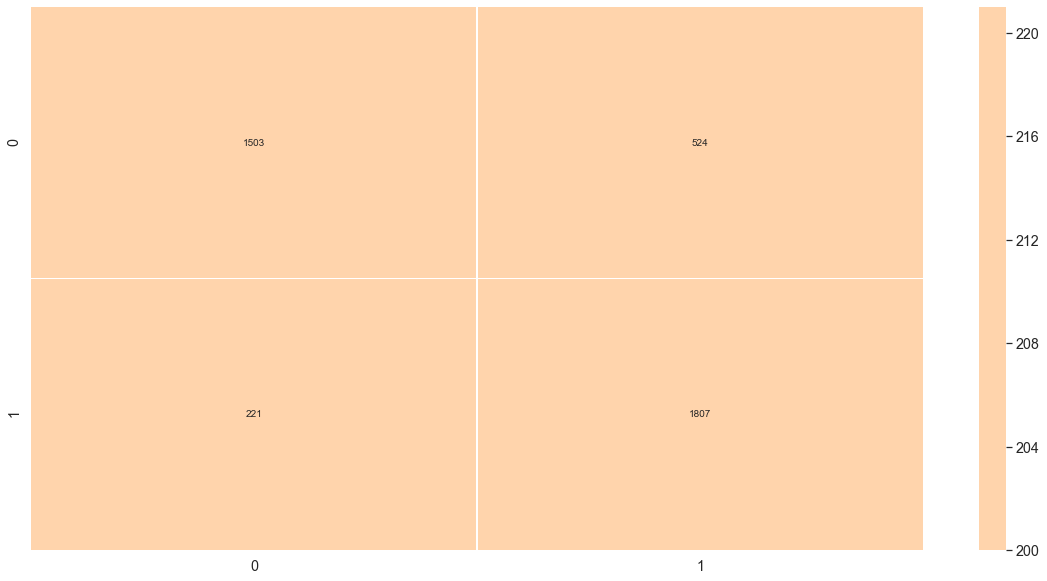

In [160]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [171]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",  alpha=0.9 ,
                 color="pink" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

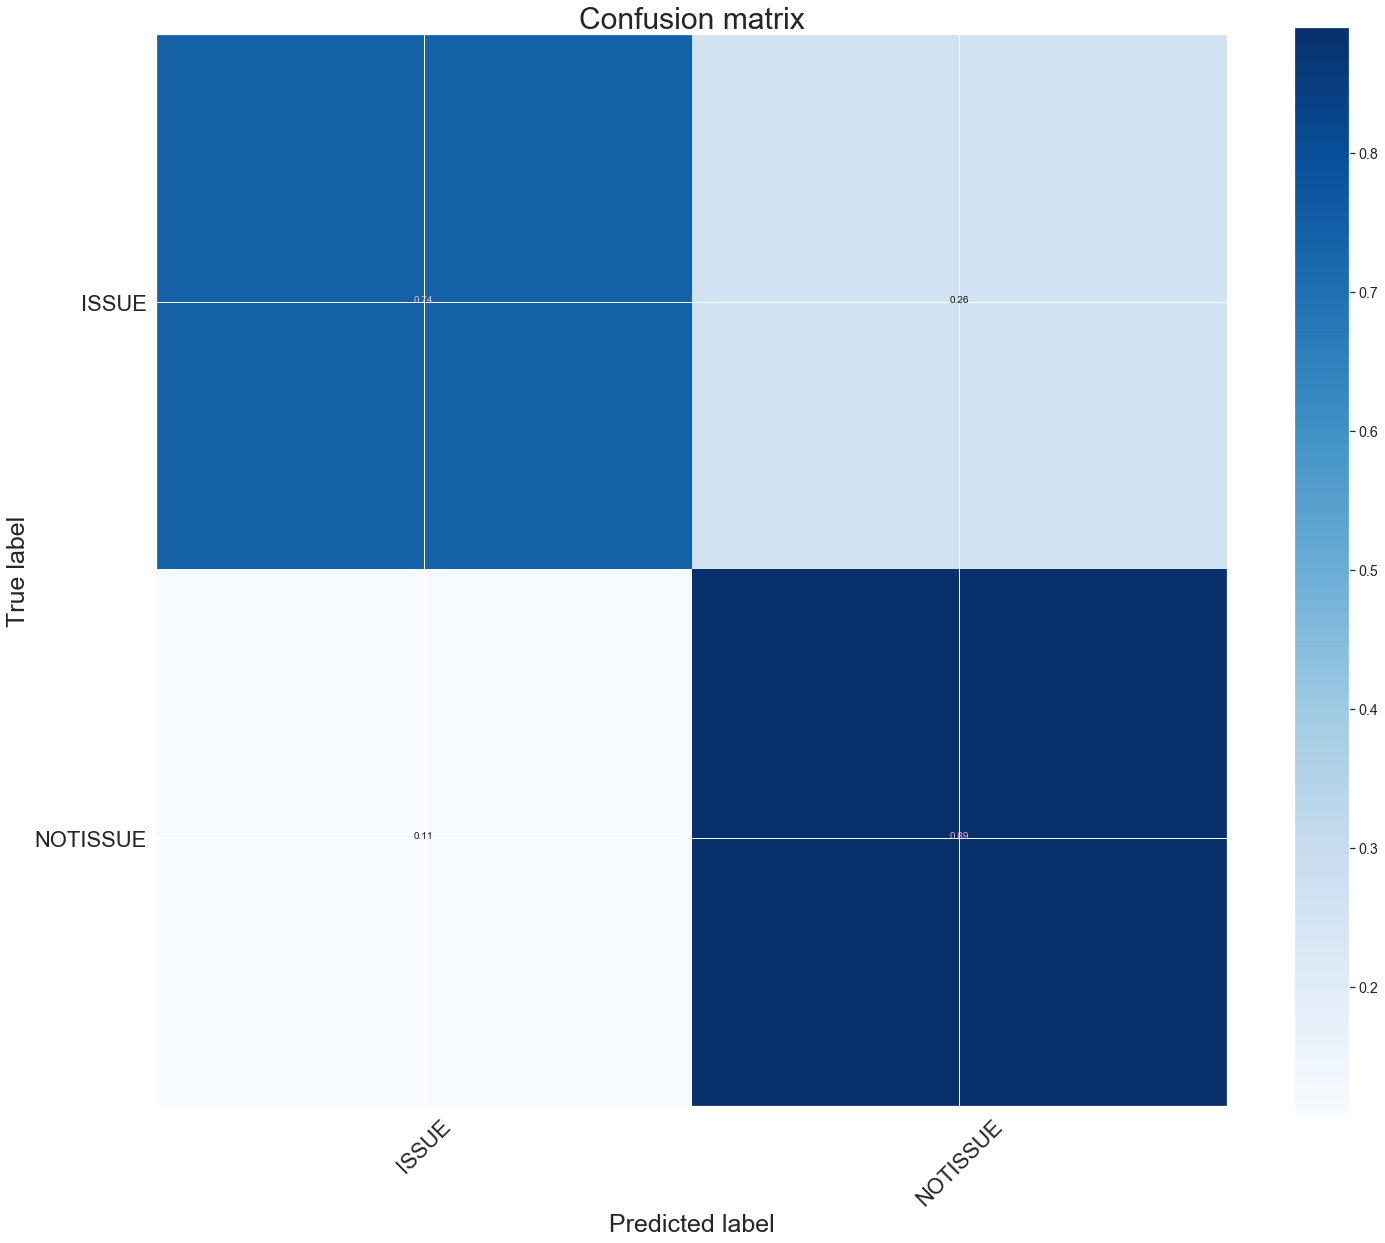

In [172]:
cnf_matrix = confusion_matrix(df.label, data_predict.label)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['ISSUE','NOTISSUE'], title="Confusion matrix")
plt.show()

In [163]:
from sklearn.metrics import classification_report, accuracy_score

print('accuracy %s' % accuracy_score(data_predict.label, df.label))
print(classification_report(df.label, data_predict.label,target_names=['ISSUE','NOTISSUE']))

accuracy 0.8162762022194822
              precision    recall  f1-score   support

       ISSUE       0.87      0.74      0.80      2027
    NOTISSUE       0.78      0.89      0.83      2028

   micro avg       0.82      0.82      0.82      4055
   macro avg       0.82      0.82      0.82      4055
weighted avg       0.82      0.82      0.82      4055



In [164]:
def false_pos_neg(input_file,output_file,falses_file):
    diff= pd.DataFrame(columns=['true_label','pred_label', 'Text'])
    data = pd.read_csv(input_file,delimiter=',')
    data_pred = pd.read_csv(output_file,delimiter=';')
    t_labels = data.label
    p_labels = data_pred.label
    
    label=data.text.values
    t_label = t_labels.values
    p_label = p_labels.values
    for i in range(len(t_label)):
        if t_label[i]!=p_label[i]:
            diff = diff.append({'true_label':t_label[i],'pred_label':p_label[i], 'Text':label[i]},ignore_index=True)
    diff.to_csv(falses_file,sep=';')
    return diff

In [165]:
falses_file='../Data/false_pred_glove300_with_text_preprocessing_v9.csv'
diff=false_pos_neg(input_file,output_file,falses_file)
print(diff)

    true_label pred_label                                               Text
0     NOTISSUE      ISSUE                                     not be happier
1        ISSUE   NOTISSUE                               solo technology suck
2        ISSUE   NOTISSUE  picture resolution far comparably price phone ...
3        ISSUE   NOTISSUE  stupid have keep buy new charger car charger c...
4        ISSUE   NOTISSUE                            plastic break easy clip
5     NOTISSUE      ISSUE                             do not make mistake do
6        ISSUE   NOTISSUE    oh forget mention weird color effect have phone
7        ISSUE   NOTISSUE         area unit break be not fond magnetic strap
8     NOTISSUE      ISSUE  sanyo have survive dozen drop blackton ill effect
9     NOTISSUE      ISSUE               find cell phone right away enter car
10       ISSUE   NOTISSUE                                        low quality
11       ISSUE   NOTISSUE                    wish return unit get back money